In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.ticker as ticker

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
overdose_data = pd.read_csv("C:/Users/Owner/Desktop/SMU_ETL_Team_4/Resources/overdoses.csv")
prescriber_data = pd.read_csv("C:/Users/Owner/Desktop/SMU_ETL_Team_4/Resources/prescriber_clean.csv")


In [2]:
#rename overdose columns
overdose_df = overdose_data.rename(columns={'State': 'State_Long','Abbrev':'State_Short'})
overdose_df.head()


,State_Long,Population,Deaths,State_Short
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [3]:
#Sort overdose data by State and Deaths
overdose_df.deaths = overdose_df.groupby(['State_Short','Deaths'],as_index = False).sum()
overdose_df.Deaths = overdose_df.Deaths.str.replace(',', '')
overdose_df.Deaths = overdose_df.Deaths.astype(float)
overdose_df = pd.DataFrame(overdose_df)
overdose_df.describe()


,Deaths
count,50.000000
mean,939.180000
std,898.195486
min,43.000000
25%,281.000000
50%,712.000000
75%,1209.750000
max,4521.000000


In [4]:
#Sort State by Population
df2 = overdose_df.groupby(['State_Short','Population'],as_index = False).sum()
df2.Population = df2.Population.str.replace(',', '')
df2.Population = df2.Population.str.replace(' ', '')
df2.Population = df2.Population.astype(float)
df2.Population = df2.Population
df2.describe()

,Population,Deaths
count,5.000000e+01,50.000000
mean,6.309648e+06,939.180000
std,7.061295e+06,898.195486
min,5.826580e+05,43.000000
25%,1.857857e+06,281.000000
50%,4.510382e+06,712.000000
75%,6.901760e+06,1209.750000
max,3.833252e+07,4521.000000


In [5]:
#Merge Deaths and Population DataFrames
#Delete 2 extra columns
#Rename 2 columns

State_merge = pd.merge(df2, overdose_df, on='State_Short', how="outer")
del State_merge['Population_y']
del State_merge['Deaths_y']
State_df = State_merge.rename(columns={'Population_x': 'Population','Deaths_x':'Deaths'})
State_df.head()

,State_Short,Population,Deaths,State_Long
0,AK,735132.0,124.0,Alaska
1,AL,4833722.0,723.0,Alabama
2,AR,2959373.0,356.0,Arkansas
3,AZ,6626624.0,1211.0,Arizona
4,CA,38332521.0,4521.0,California


In [6]:
#Getting Per Capita Death
State_df['Deaths/Population'] = State_df['Deaths']/State_df['Population'] * 1000
State_df['Deaths/Population'].head()

0    0.168677
1    0.149574
2    0.120296
3    0.182748
4    0.117942
Name: Deaths/Population, dtype: float64

In [7]:
#rename prescriber columns
prescriber_df = prescriber_data.rename(columns={'State': 'State_Short'})
prescriber_df.head()

,Unnamed: 0,State_Short,Gender,Specialty
0,0,TX,M,Dentist
1,1,AL,F,General Surgery
2,2,NY,F,General Practice
3,3,AZ,M,Internal Medicine
4,4,NV,M,Hematology/Oncology


In [8]:
#Remove abbreviations that are not of the US States from prescriber data
prescriber_not = prescriber_df[(prescriber_df.State_Short != 'AA') & 
                              (prescriber_df.State_Short != 'ZZ') & 
                              (prescriber_df.State_Short != 'AE') &
                              (prescriber_df.State_Short != 'PR') &
                              (prescriber_df.State_Short != 'GU') &
                              (prescriber_df.State_Short != 'VI') &
                              (prescriber_df.State_Short != 'DC')
]
prescriber_not.shape


(24680, 4)

In [9]:
#Sort State by Gender
State_Gender_df = prescriber_not.groupby(['State_Short','Gender']).sum()
State_Gender_df


Unnamed: 0
State_Short Gender            
AK          F           196686
            M           253721
AL          F          1311446
            M          2839488
AR          F           757047
...                        ...
WI          M          3493569
WV          F           736583
            M          1701875
WY          F           117594
            M           417070

[100 rows x 1 columns]

In [10]:
# Combine the data into a single dataset
merge_data = pd.merge(prescriber_not, State_df, on='State_Short', how="outer")

# Display the data table for preview
merge_data.head()


,Unnamed: 0,State_Short,Gender,Specialty,Population,Deaths,State_Long,Deaths/Population
0,0,TX,M,Dentist,26448193.0,2601.0,Texas,0.098343
1,8,TX,M,Optometry,26448193.0,2601.0,Texas,0.098343
2,11,TX,M,General Surgery,26448193.0,2601.0,Texas,0.098343
3,14,TX,F,Hematology/Oncology,26448193.0,2601.0,Texas,0.098343
4,53,TX,M,Urology,26448193.0,2601.0,Texas,0.098343


In [11]:
#Remove abbreviations that not are of the US States from the final data
merge_final = merge_data[(merge_data.State_Short != 'AA') & 
                         (merge_data.State_Short != 'ZZ') & 
                         (merge_data.State_Short != 'AE') &
                         (merge_data.State_Short != 'PR') &
                         (merge_data.State_Short != 'GU') &
                         (merge_data.State_Short != 'VI') &
                         (merge_data.State_Short != 'DC')
]
merge_final.shape

(24680, 8)

In [12]:
#Sort State, Deaths, Population, and Deaths/Population
df = merge_final.groupby(['State_Short','Deaths','Population','Deaths/Population'],as_index = False).sum()
df.head()

,State_Short,Deaths,Population,Deaths/Population,Unnamed: 0
0,AK,124.0,735132.0,0.168677,450407
1,AL,723.0,4833722.0,0.149574,4150934
2,AR,356.0,2959373.0,0.120296,2702004
3,AZ,1211.0,6626624.0,0.182748,6299141
4,CA,4521.0,38332521.0,0.117942,32491896


In [13]:
#Matplotlib
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]

Text(0, 0.5, 'Population (Million)')

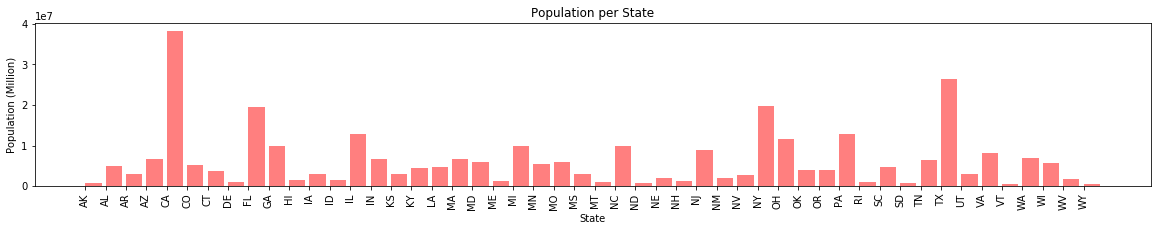

In [14]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, df["Population"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, df["State_Short"], rotation="vertical")

plt.title("Population per State")
plt.xlabel("State")
plt.ylabel("Population (Million)")

In [15]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../SMU_ETL_Team_4/Images/Population_per_State.png")
plt.show()

<Figure size 432x288 with 0 Axes>